PCA for Data Visulaization and Dimentionality reduction


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iriscsv


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load directly from sklearn
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

print(X.head())
print(y.head())




   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)



In [ ]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
u,s,v = np.linalg.svd(X.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9380850501999953
0.9201649041624852
0.14774182104494774
0.0208538621764632


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
Y = X.dot(matrix_w)

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")


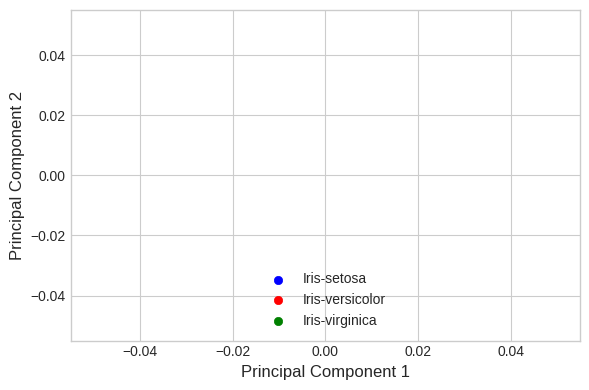

In [ ]:
import matplotlib.pyplot as plt

# Choose a built-in matplotlib style (no seaborn needed)
with plt.style.context("seaborn-v0_8-whitegrid"):
    plt.figure(figsize=(6, 4))

    # Example scatter plot (replace Y and y with your PCA + labels)
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y == lab, 0], Y[y == lab, 1], label=lab, c=col)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

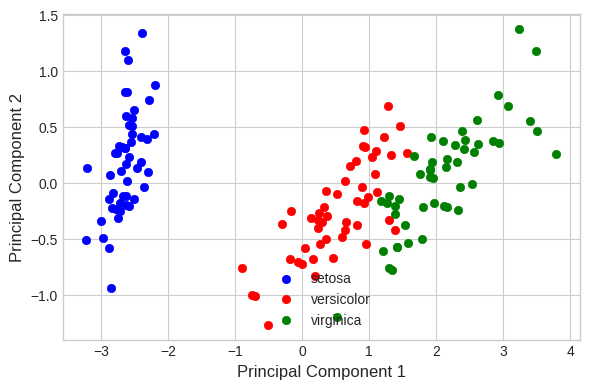

In [ ]:

# Apply PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(X)

# Plot with seaborn-whitegrid style
plt.style.use("seaborn-v0_8-whitegrid")  # updated style name in newer matplotlib

plt.figure(figsize=(6, 4))
colors = ['blue', 'red', 'green']

for i, color, label in zip(range(3), colors, labels):
    plt.scatter(Y[y == i, 0], Y[y == i, 1], c=color, label=label)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="lower center")
plt.tight_layout()
plt.show()


t-SNE for Non Linear Dependencies

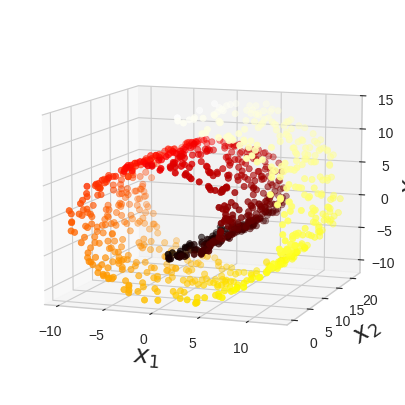

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()